## Sales Prediction Modeling

**Key Components in Pipeline:**
    

- **Pipeline:**

    - A pipeline in scikit-learn allows us to chain multiple steps, such as preprocessing and model fitting, into one object. This ensures reproducibility and modularity.

- The pipeline consists of:

    - `StandardScaler`: For standardizing the numeric features.
    
    - `RandomForestRegresso`r: A tree-based regressor that works well with various types of data.

- `preprocess_data()`:

    - This method handles the preprocessing of the data by splitting it into training and test sets. It removes the target column from the features and separates them appropriately.

- `train_model():`

    - The model is trained using the training data through the pipeline, where the data is first scaled, and then the regressor is fit.

- `evaluate_model():`

    - The model is evaluated using the test set. The evaluation metric used is Root Mean Squared Error (RMSE), which is a standard regression metric to assess prediction accuracy.

- `feature_importance`
    - get the most important features

- `save_model()`
    - save the model
    
- `plot_actual_vs_predicted`

    - visualize the actual vs predicted to understand how the mode best fit to the training data

In [1]:
# Import necessary libraries
import pandas as pd
import logging
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Import SalesModel class
from sales_model_pipeline import SalesModel

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Imported libraries and configured logging.")

2024-09-22 04:32:17,183 - INFO - Imported libraries and configured logging.


In [2]:
logger.info("Build Model Pipeline")
if __name__ == "__main__":
    # Assume you have a DataFrame `df` with all the preprocessed features and a target 'Sales'
    train = pd.read_csv('../data/train_processed.csv')  # Replace with your actual data
    
    test = pd.read_csv('../data/test_processed.csv')  # Replace with your actual data
    # Initialize the model class
    sales_model = SalesModel()

    # Preprocess the data and split into train/test sets
    sales_model.preprocess_data(train, target_column='Sales')
       
    # Train the RandomForestRegressor model
    sales_model.train_model()

    # Evaluate the model and print the RMSE
    sales_model.evaluate_model()
    # print(f"Model RMSE: {rmse:.2f}")

2024-09-22 04:32:17,203 - INFO - Build Model Pipeline


Model RMSE: 815.34
Model RMSLE: 0.1397


In [3]:
# Print feature importance of each feature
sales_model.feature_importance().reset_index(name='score').sort_values(by='score', ascending=False)

,index,score
0,Open,0.526415
1,Store,0.139246
2,CompetitionDistance,0.130789
3,Promo,0.078585
4,DayOfWeek,0.032061
5,StoreType,0.021088
6,Month,0.016287
7,Promo2,0.011143
8,DaysAfterHoliday,0.010738
9,DaysToHoliday,0.010659


In [4]:
# Save the model
sales_model.save_model()

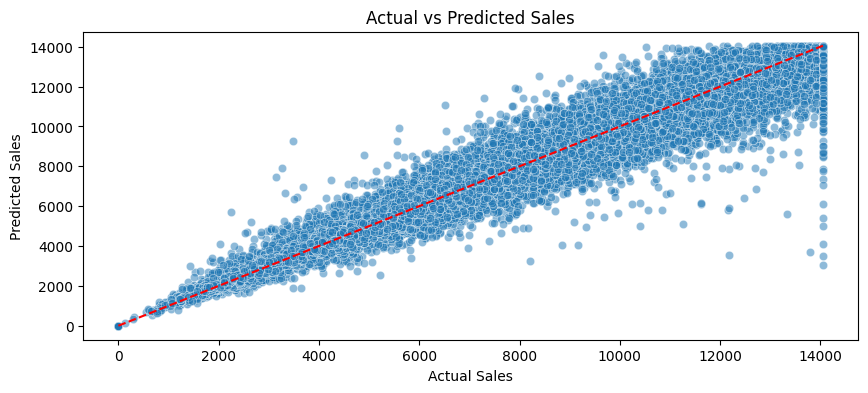

In [ ]:
# plot actual vs predicted
sales_model.plot_actual_vs_predicted()

In [ ]:
# Optionally create a submission file
# Get Id from the original test data
test_id = pd.read_csv('../data/test.csv')

sales_model.create_submission_file(test, test_id['Id'], '../data/submission.csv')

Submission file saved as ../data/submission.csv


In [ ]:
test_ = pd.read_csv('../data/test_cleaned.csv')
test.shape

(41088, 20)

In [ ]:
test.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,IsWeekend,Month,Year,DaysToHoliday,DaysAfterHoliday,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,IsHoliday,Customers
0,-1.731640,3,0.452399,1.273237,-0.159217,-0.466372,0.580451,-0.940975,-0.650125,-1.001128,-0.630672,9,2015,-1.909016,1.909016,-0.547197,1.081601,-0.668263,-0.490485,609.0
1,-1.725427,3,0.452399,1.273237,-0.159217,-0.466372,-0.884348,-0.940975,1.825377,0.998873,-0.630672,9,2015,-1.909016,1.909016,-0.547197,1.081601,-0.668263,-0.490485,609.0
2,-1.713001,3,0.452399,1.273237,-0.159217,-0.466372,-0.884348,1.071502,1.994292,-1.001128,-0.630672,9,2015,-1.909016,1.909016,-0.547197,1.081601,-0.668263,-0.490485,609.0
3,-1.709895,3,0.452399,1.273237,-0.159217,-0.466372,-0.884348,-0.940975,0.552977,-1.001128,-0.630672,9,2015,-1.909016,1.909016,-0.547197,1.081601,-0.668263,-0.490485,609.0
4,-1.706789,3,0.452399,1.273237,-0.159217,-0.466372,-0.884348,1.071502,-0.503827,-1.001128,-0.630672,9,2015,-1.909016,1.909016,-0.547197,1.081601,-0.668263,-0.490485,609.0
